##Linear Regression


In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [ ]:
# https://github.com/Ranadheer-senani/AI-MachineLearningLab/tree/main/Datasets-lab
df = pd.read_csv('https://raw.githubusercontent.com/Ranadheer-senani/AI-MachineLearningLab/main/Datasets-lab/linear-house.csv')
df.head(5)

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


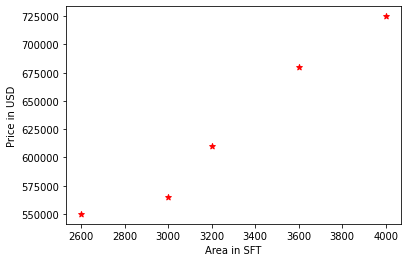

In [ ]:
%matplotlib inline
plt.xlabel('Area in SFT')
plt.ylabel('Price in USD')
plt.scatter(df.area,df.price,color='red',marker='*')

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [ ]:
reg.predict([[3300]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([628715.75342466])

In [ ]:
reg.coef_

array([135.78767123])

In [ ]:
reg.intercept_

180616.43835616432

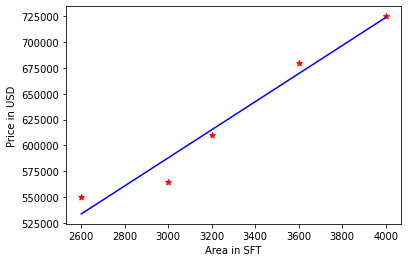

In [ ]:
%matplotlib inline
plt.xlabel('Area in SFT')
plt.ylabel('Price in USD')
plt.scatter(df.area,df.price,color='red',marker='*')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

In [ ]:
testdf = pd.read_csv('https://github.com/Ranadheer-senani/AI-MachineLearningLab/raw/main/Datasets-lab/areas.csv')
testdf

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [ ]:
testdf['pred-prices'] = list(map(int,reg.predict(testdf[['area']])))
testdf

,area,pred-prices
0,1000,316404
1,1500,384297
2,2300,492928
3,3540,661304
4,4120,740061
5,4560,799808
6,5490,926090
7,3460,650441
8,4750,825607
9,2300,492928


##Multiple Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
df = pd.read_csv('https://github.com/Ranadheer-senani/AI-MachineLearningLab/raw/main/Datasets-lab/houseprice-multi.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [ ]:
df.bedrooms.median()

3.5

In [ ]:
median_beds = int(df.bedrooms.median())

In [ ]:
df.bedrooms=df.bedrooms.fillna(median_beds)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [ ]:
reg.predict([[3000,3,40]])
reg.coef_
reg.intercept_

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


383724.99999999994

## Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [ ]:
df = pd.read_csv("https://github.com/Ranadheer-senani/AI-MachineLearningLab/raw/main/Datasets-lab/insurance-logistic.csv")
df.head(5)

,age,bought_ins
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


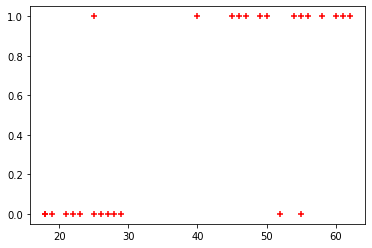

In [ ]:
plt.scatter(df.age,df.bought_ins,marker = "+", color="red")

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df[['age']],df.bought_ins,test_size=0.1)

In [ ]:
x_test

,age
4,46
1,25
8,62


In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
model.predict(x_test)

array([1, 0, 1])

In [ ]:
x_test

,age
4,46
1,25
8,62


In [ ]:
model.score(x_test,y_test)

1.0

In [ ]:
model.predict_proba(x_test)

array([[0.30047234, 0.69952766],
       [0.85902063, 0.14097937],
       [0.05387055, 0.94612945]])

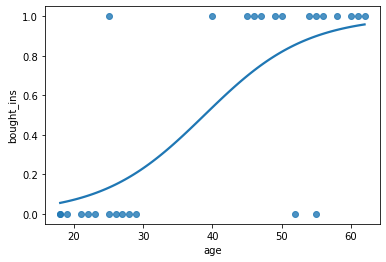

In [ ]:
sns.regplot(x=df.age,y=df.bought_ins,data=df,logistic=True,ci=None)

##Decision Tree

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Ranadheer-senani/AI-MachineLearningLab/main/Datasets-lab/salaries-decisiontree.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [ ]:
inputs = df.drop('salary_more_then_100k', axis = 'columns')
target = df['salary_more_then_100k']

In [ ]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [ ]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [ ]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [ ]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')

In [ ]:
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [ ]:
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [ ]:
model.score(inputs_n,target)

1.0

In [ ]:
#Is salary of a Google Computer Engineer with a Bacheolers Degree > 100k ?
model.predict([[2,1,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [ ]:
#Is salary of a Google Computer Programmer with a masters degree > 100k ?
model.predict([[2,1,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

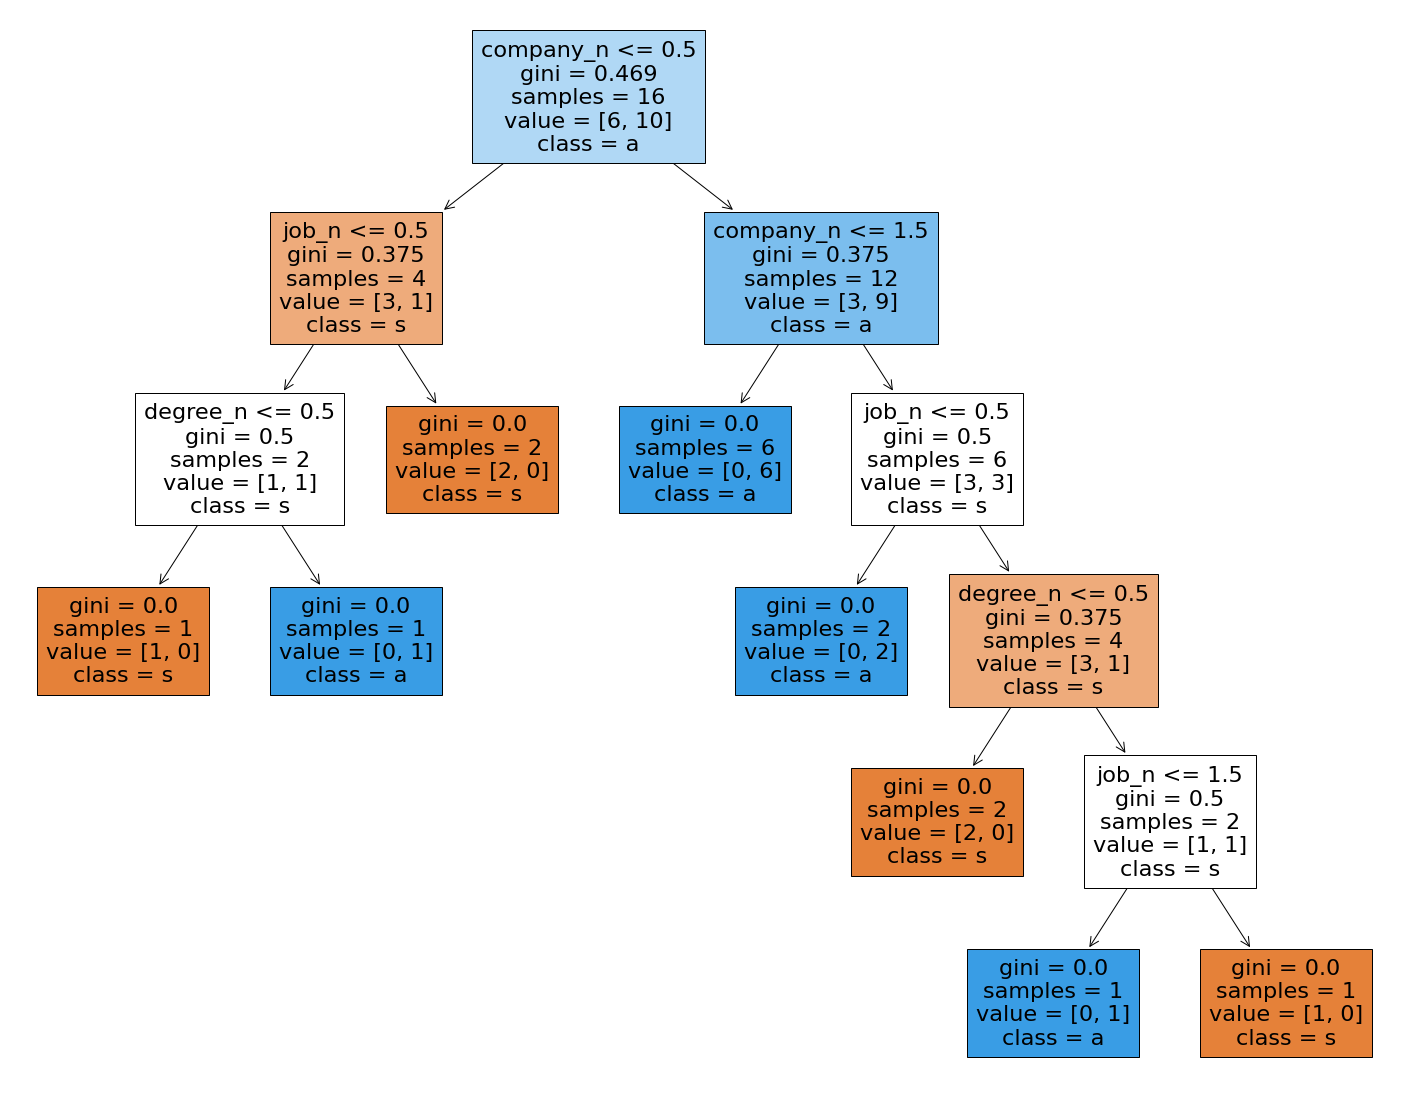

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=['company_n','job_n','degree_n'],  
                   class_names='salary_more_then_100k',
                   filled=True)

## Reinforcement Learning


In [ ]:
import random
from typing import List

class SampleEnvironment:
  def __init__(self):
    self.steps_left = 20

  def get_observation(self) -> List[float]:
    return[0.0,0.0,0.0]
  
  def get_actions(self) -> List[int]:
    return [0,1]

  def is_done(self)-> bool:
    return self.steps_left == 0

  def action(self, action:int) -> float:
    if self.is_done():
      raise Exception("Game is over")
    self.steps_left -=1
    return random.random()

In [ ]:
class Agent:
  def __init__(self):
    self.total_reward = 0.0

  def step(self, env: SampleEnvironment):
    current_obs = env.get_observation()
    print(current_obs)
    actions = env.get_actions()
    print(actions)
    reward = env.action(random.choice(actions))
    self.total_reward +=reward
    print("Total reward {}".format(self.total_reward))

In [ ]:
if __name__ == "__main__":
  env = SampleEnvironment()
  agent = Agent()
  i=0
  while not env.is_done():
    i = i+1
    print("Steps {}".format(i))
    agent.step(env)
    print("Total reward got: ", agent.total_reward)

Steps 1
[0.0, 0.0, 0.0]
[0, 1]
Total reward 0.6916668833333707
Total reward got :%.4f
0.6916668833333707
Steps 2
[0.0, 0.0, 0.0]
[0, 1]
Total reward 0.9248569740614704
Total reward got :%.4f
0.9248569740614704
Steps 3
[0.0, 0.0, 0.0]
[0, 1]
Total reward 0.9794382362712507
Total reward got :%.4f
0.9794382362712507
Steps 4
[0.0, 0.0, 0.0]
[0, 1]
Total reward 1.170067153748712
Total reward got :%.4f
1.170067153748712
Steps 5
[0.0, 0.0, 0.0]
[0, 1]
Total reward 1.2805284536938206
Total reward got :%.4f
1.2805284536938206
Steps 6
[0.0, 0.0, 0.0]
[0, 1]
Total reward 1.5152701859616102
Total reward got :%.4f
1.5152701859616102
Steps 7
[0.0, 0.0, 0.0]
[0, 1]
Total reward 1.902949938877765
Total reward got :%.4f
1.902949938877765
Steps 8
[0.0, 0.0, 0.0]
[0, 1]
Total reward 2.776296221816873
Total reward got :%.4f
2.776296221816873
Steps 9
[0.0, 0.0, 0.0]
[0, 1]
Total reward 3.4361429022226626
Total reward got :%.4f
3.4361429022226626
Steps 10
[0.0, 0.0, 0.0]
[0, 1]
Total reward 3.86289072498436

## Artificial Neural Network with Back Propagation

In [ ]:
import numpy as np

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x)*(1.0-sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1.0 - x**2


class NeuralNetwork:

    def __init__(self, layers, activation='tanh'):
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_prime = sigmoid_prime
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_prime = tanh_prime

        # Set weights
        self.weights = []
        # layers = [2,2,1]
        # range of weight values (-1,1)
        # input and hidden layers - random((2+1, 2+1)) : 3 x 3
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
        # output layer - random((2+1, 1)) : 3 x 1
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.5, epochs=100000):
        # Add column of ones to X
        # This is to add the bias unit to the input layer
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
         
        for k in range(epochs):
            if k % 10000 == 0: print ('epochs:', k)
            
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
            # output layer
            error = y[i] - a[-1]
            deltas = [error * self.activation_prime(a[-1])]

            # we need to begin at the second to last layer 
            # (a layer before the output layer)
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight.
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)

    def predict(self, x): 
        a = np.concatenate((np.ones(1).T,np.array(x)))      
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

if __name__ == '__main__':

    nn = NeuralNetwork([2,2,1])

    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])

    y = np.array([0, 1, 1, 0])

    nn.fit(X, y)

    for e in X:
        print(e,nn.predict(e))

epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000
[0 0] [-0.00017476]
[0 1] [0.99774808]
[1 0] [0.9979079]
[1 1] [-0.00016343]


##SVM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('https://github.com/Ranadheer-senani/AI-MachineLearningLab/raw/main/Datasets-lab/SVM.csv')
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [ ]:
x=df.iloc[:,:2]
y=df.Y
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape,y_train.shape)

(300, 2) (300,)


In [ ]:
model = SVC(kernel="rbf")
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

# Supervised Learning

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
iris = datasets.load_iris()
Model = KNeighborsClassifier(n_neighbors=6)
Model.fit(iris.data,iris.target)
X = [
      [5.9, 1.0, 5.1, 1.8],
      [3.4, 2.0, 1.1, 4.8],
    ]
Model.predict(X)

array([1, 1])